## Momentum con diferentes polinomios


<h3>Objetivo de este cuaderno<h3>
<h5> 1. Aprender sobre puntos de silla, mínimos locales y ruido</h5>

In [1]:
# These are the libraries that will be used for this lab.

import torch
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

Esta función **graficará una función cúbica** y los **valores de los parámetros obtenidos mediante Descenso de Gradiente**.


In [2]:
# Plot the cubic

def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='parameter values')

    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

Esta función graficará una función de cuarto orden y los valores de los parámetros obtenidos mediante Descenso de Gradiente. También puedes agregar ruido gaussiano con una desviación estándar determinada por el parámetro <code>std</code>.


In [3]:
# Plot the fourth order function and the parameter values

def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()

    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')

    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

Este es un módulo personalizado. Se comportará como un único valor de parámetro. Lo hacemos de esta manera para poder usar los optimizadores integrados de PyTorch.


In [5]:
# Create a linear model

class one_param(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)

    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Creamos un objeto <code>w</code>; cuando llamamos al objeto con una entrada de uno, se comportará como **un valor de parámetro individual**. Es decir, <code>w(1)</code> es análogo a $w$.


In [6]:
# Create a one_param object

w = one_param(1, 1)

#### Puntos de silla


Vamos a crear una función cúbica con puntos de silla.


In [7]:
# Define a function to output a cubic

def cubic(yhat):
    out = yhat ** 3
    return out

Creamos un optimizador sin término de momentum.


In [8]:
# Create a optimizer without momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)

Ejecutamos varias iteraciones de descenso de gradiente estocástico y graficamos los resultados. Observamos que los valores de los parámetros quedan atrapados en el punto de silla.


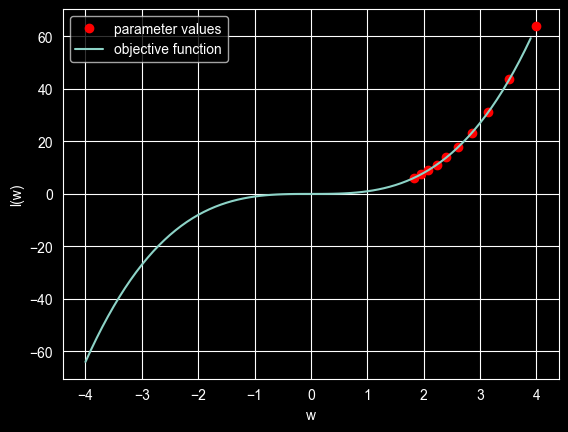

In [9]:
# Plot the model

plot_cubic(w, optimizer)

Creamos un optimizador con un término de momentum de 0.9.


In [10]:
# Create a optimizer with momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)

Ejecutamos varias iteraciones de descenso de gradiente estocástico con momentum y graficamos los resultados. Observamos que los valores de los parámetros no quedan atrapados en el punto de silla.


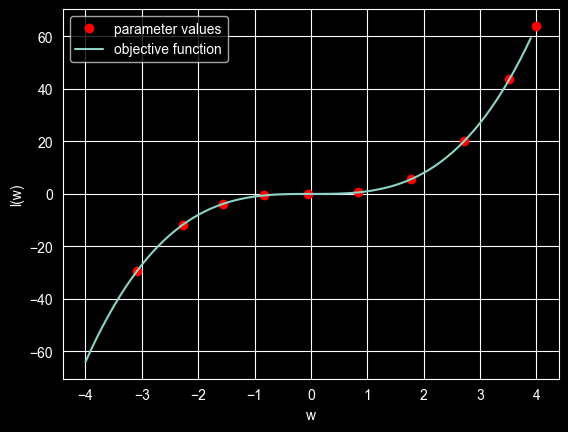

In [11]:
# Plot the model

plot_cubic(w, optimizer)

#### Minimo Local

En esta sección, crearemos un polinomio de cuarto orden con un mínimo local en <i>4</i> y un mínimo global en <i>-2</i>. Luego veremos cómo el parámetro de momentum afecta la convergencia hacia el mínimo global. El polinomio de cuarto orden está dado por:


In [12]:
# Create a function to calculate the fourth order polynomial

def fourth_order(yhat):
    out = torch.mean(2 * (yhat ** 4) - 9 * (yhat ** 3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

Creamos un optimizador sin término de momentum. Ejecutamos varias iteraciones de descenso de gradiente estocástico y graficamos los resultados. Observamos que los valores de los parámetros quedan atrapados en el mínimo local.


C:\Users\Josue Santana Robled\AppData\Local\Temp\ipykernel_8276\3135092298.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


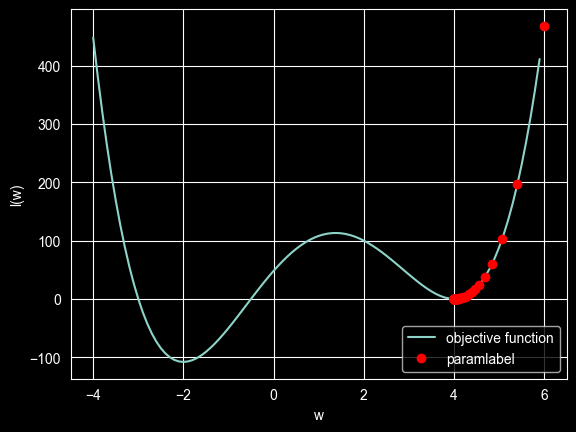

In [13]:
# Make the prediction without momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)

Creamos un optimizador con un término de momentum de 0.9. Ejecutamos varias iteraciones de descenso de gradiente estocástico y graficamos los resultados. Observamos que los valores de los parámetros alcanzan el mínimo global.


C:\Users\Josue Santana Robled\AppData\Local\Temp\ipykernel_8276\3135092298.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


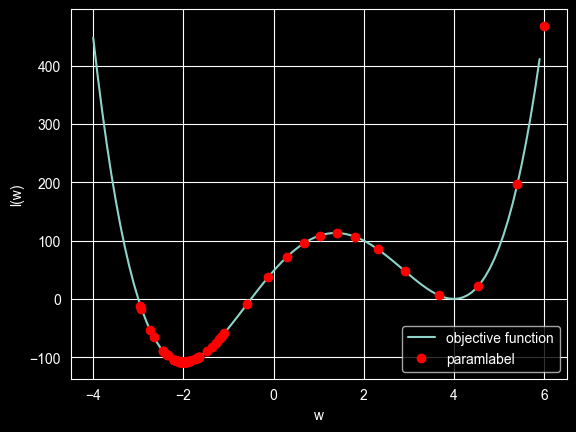

In [14]:
# Make the prediction with momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

#### Ruido

En esta sección, crearemos un polinomio de cuarto orden con un mínimo local en 4 y un mínimo global en -2, pero agregaremos ruido a la función cuando se calcule el gradiente. Luego veremos cómo el parámetro de momentum afecta la convergencia hacia el mínimo global.


Sin momentum, quedamos atrapados en un mínimo local.


C:\Users\Josue Santana Robled\AppData\Local\Temp\ipykernel_8276\3135092298.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


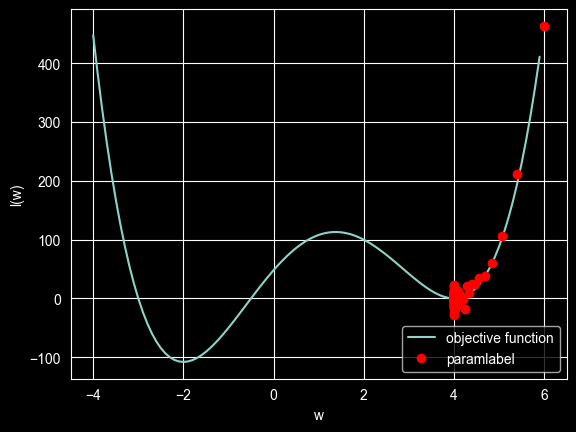

In [15]:
# Make the prediction without momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

Con momentum, llegamos al mínimo global.

C:\Users\Josue Santana Robled\AppData\Local\Temp\ipykernel_8276\3135092298.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


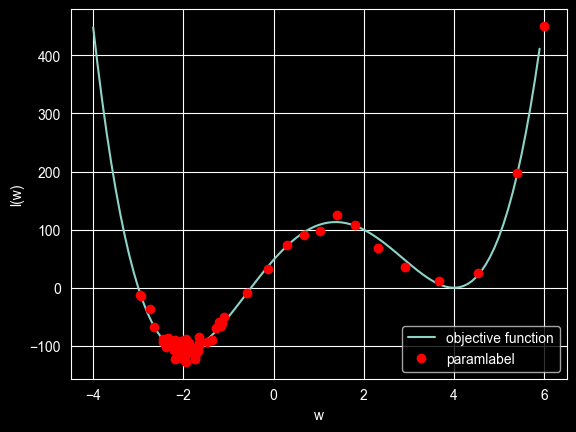

In [16]:
# Make the prediction with momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001,momentum=0.9)
plot_fourth_order(w, optimizer, std=10)

#### Practica

Crea dos objetos <code>SGD</code> con una **tasa de aprendizaje de <code>0.001</code>**. Usa el **valor de momentum por defecto** para uno y un **valor de <code>0.9</code>** para el segundo.

Utiliza la función <code>plot_fourth_order</code> con <code>std=100</code> para **graficar los diferentes pasos de cada uno**.

Asegúrate de **ejecutar la función en dos celdas independientes**.


C:\Users\Josue Santana Robled\AppData\Local\Temp\ipykernel_8276\3135092298.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


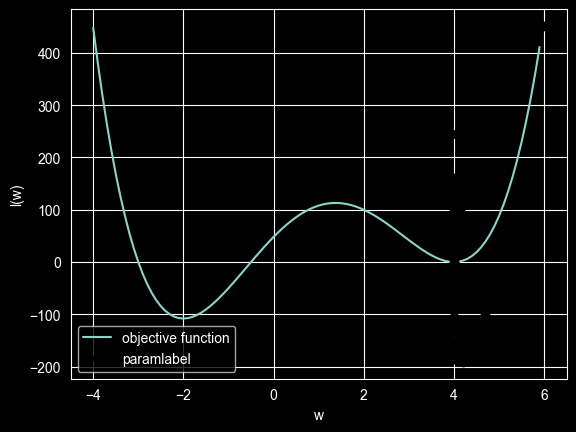

In [17]:
optimizer1 = torch.optim.SGD(w.parameters(), lr = 0.001)
plot_fourth_order(w, optimizer1, std = 100, color = 'black', paramlabel = 'parameter values with optimizer 1')

C:\Users\Josue Santana Robled\AppData\Local\Temp\ipykernel_8276\3135092298.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


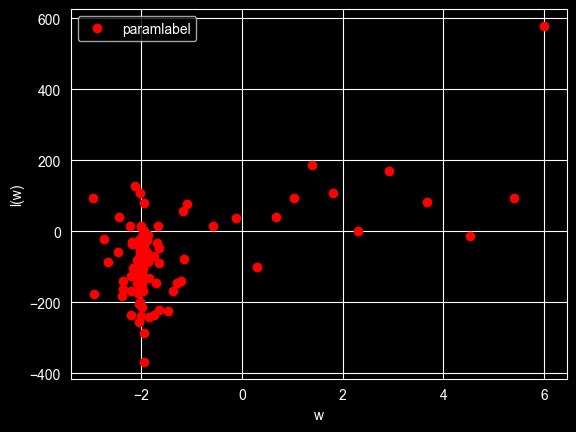

In [18]:
optimizer2 = torch.optim.SGD(w.parameters(), lr = 0.001, momentum = 0.9)
plot_fourth_order(w, optimizer2, std = 100, color = 'red', paramlabel = 'parameter values with optimizer 2', objfun = False)